# Project – Biosignal Analysis For Smoking

## Problem Statement
You are working as a data scientist in a global 
company. Over the years, the company has 
collected details and gathered a lot of 
information about individuals. The 
management wants to build an intelligent 
system from the data to determine the 
presence or absence of smoking in a person 
through bio-signals. Given a person’s 
information, build a machine learning model 
that can classify the presence or absence of 
smoking.


---

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# EDA

In [78]:
df = pd.read_csv('smoking.csv')
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


In [79]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,55682,55683,55684,55685,55686,55687,55688,55689,55690,55691
ID,0,1,2,3,4,5,6,7,9,10,...,55655,55663,55666,55671,55673,55676,55681,55683,55684,55691
gender,F,F,M,M,F,M,M,M,F,M,...,M,M,M,M,F,F,F,F,M,M
age,40,40,55,40,40,30,40,45,50,45,...,20,40,40,40,60,40,45,55,60,55
height(cm),155,160,170,165,155,180,160,165,150,175,...,175,180,170,170,150,170,160,160,165,160
weight(kg),60,60,60,70,60,75,60,90,60,75,...,75,85,65,80,50,65,50,50,60,65
waist(cm),81.3,81.0,80.0,88.0,86.0,85.0,85.5,96.0,85.0,89.0,...,85.0,86.5,85.0,90.5,75.0,75.0,70.0,68.5,78.0,85.0
eyesight(left),1.2,0.8,0.8,1.5,1.0,1.2,1.0,1.2,0.7,1.0,...,0.9,1.2,1.2,1.2,1.0,0.9,1.2,1.0,0.8,0.9
eyesight(right),1.0,0.6,0.8,1.5,1.0,1.2,1.0,1.0,0.8,1.0,...,1.5,1.2,1.2,1.5,1.2,0.9,1.2,1.2,1.0,0.7
hearing(left),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
hearing(right),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [80]:
df = df.drop(columns=['ID', 'oral'])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,55692.0,44.182917,12.071418,20.0,40.0,40.0,55.0,85.0
height(cm),55692.0,164.649321,9.194597,130.0,160.0,165.0,170.0,190.0
weight(kg),55692.0,65.864936,12.820306,30.0,55.0,65.0,75.0,135.0
waist(cm),55692.0,82.046418,9.274223,51.0,76.0,82.0,88.0,129.0
eyesight(left),55692.0,1.012623,0.486873,0.1,0.8,1.0,1.2,9.9
eyesight(right),55692.0,1.007443,0.485964,0.1,0.8,1.0,1.2,9.9
hearing(left),55692.0,1.025587,0.157902,1.0,1.0,1.0,1.0,2.0
hearing(right),55692.0,1.026144,0.159564,1.0,1.0,1.0,1.0,2.0
systolic,55692.0,121.494218,13.675989,71.0,112.0,120.0,130.0,240.0
relaxation,55692.0,76.004830,9.679278,40.0,70.0,76.0,82.0,146.0


In [83]:
df.isna().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

# Data Visualization

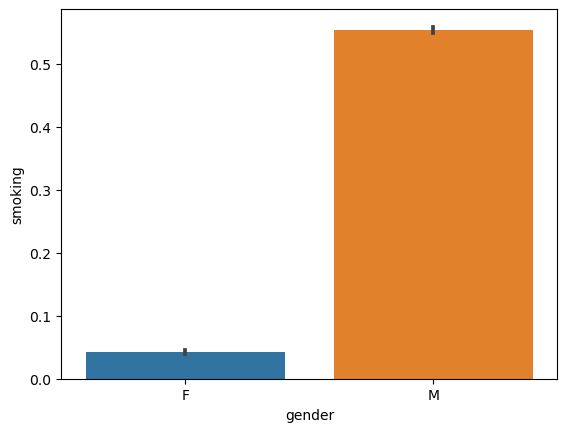

In [84]:
sns.barplot(data=df, x='gender', y='smoking')
plt.show()

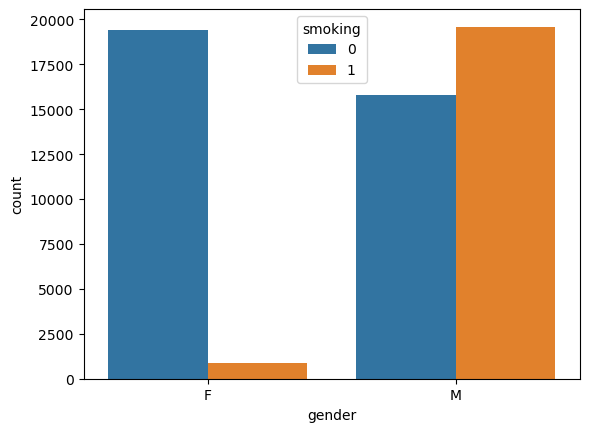

In [85]:
sns.countplot(data=df, x='gender', hue='smoking')
plt.show()

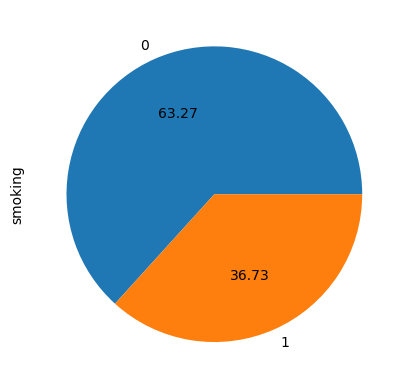

In [86]:
df['smoking'].value_counts().plot.pie(autopct='%0.2f')
plt.show()

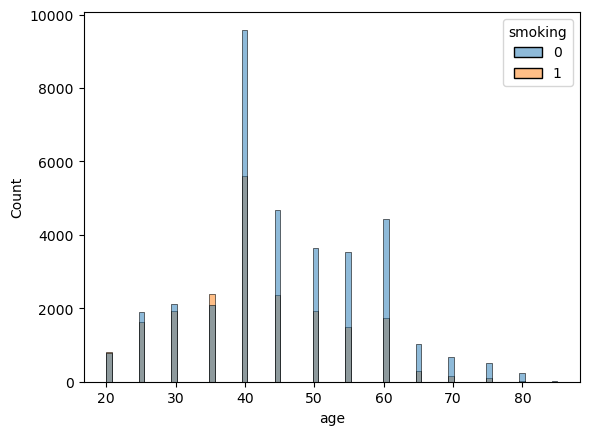

In [87]:
sns.histplot(data=df, x='age', hue='smoking')
plt.show()

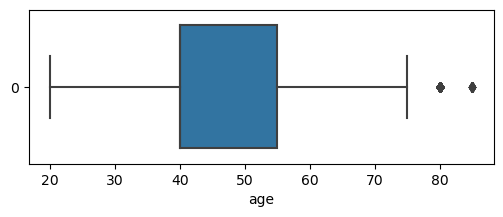

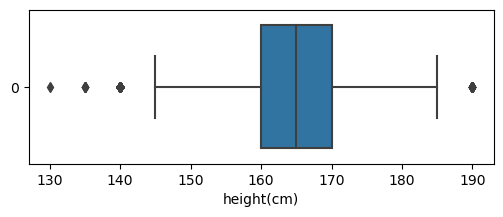

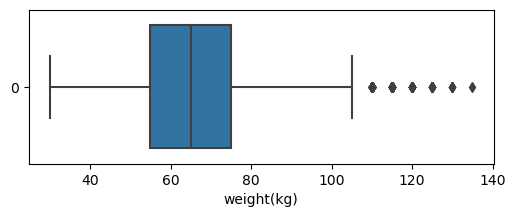

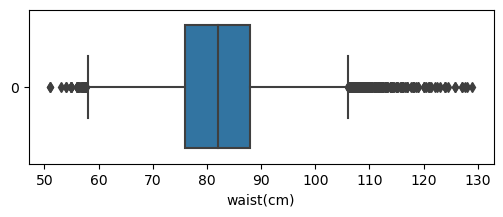

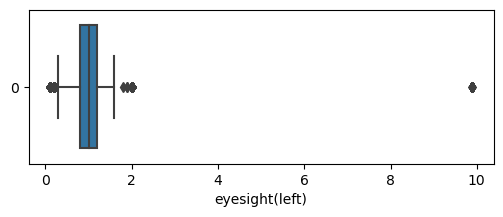

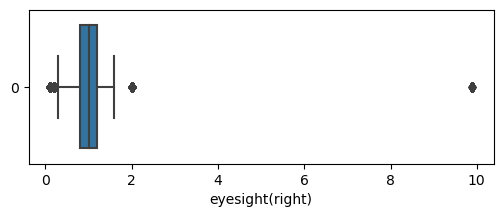

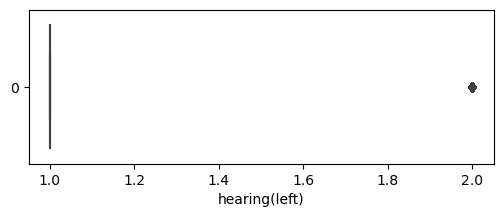

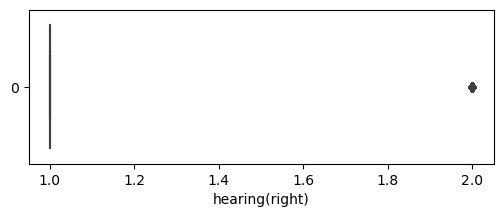

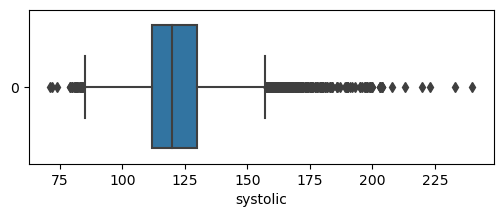

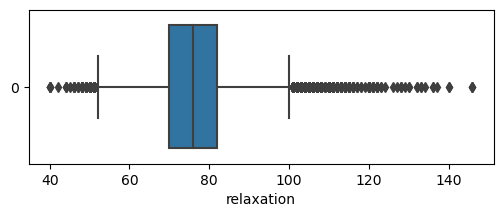

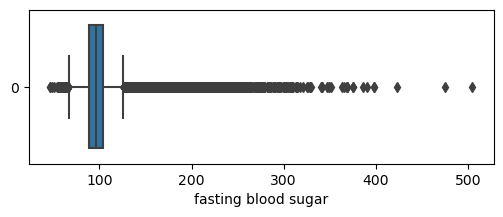

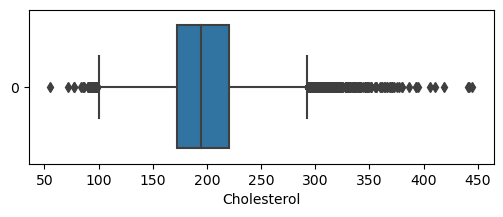

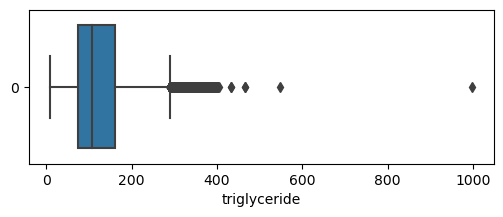

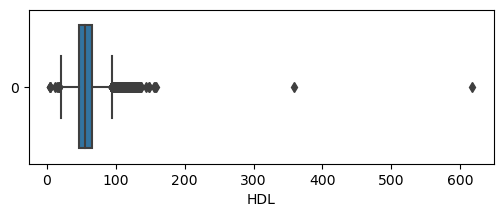

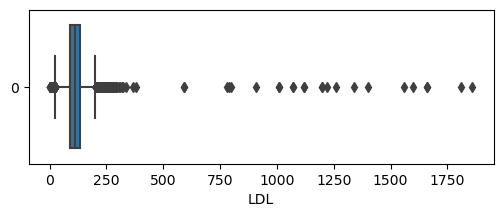

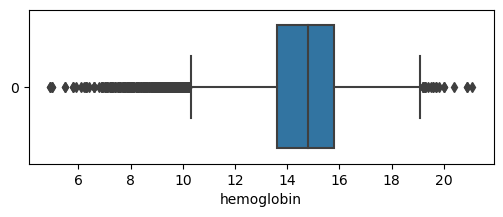

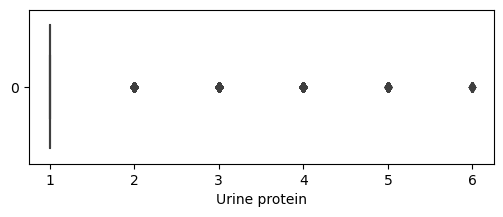

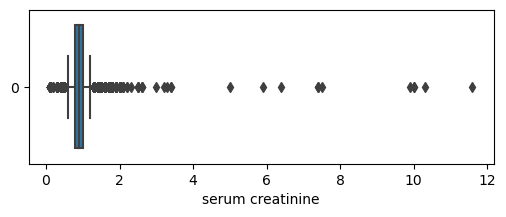

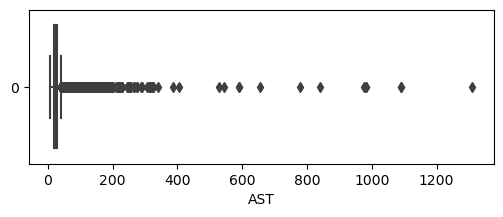

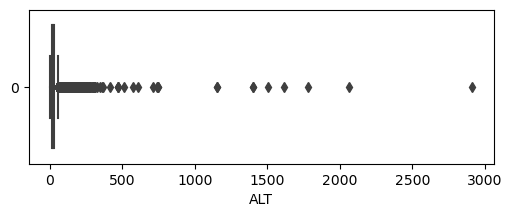

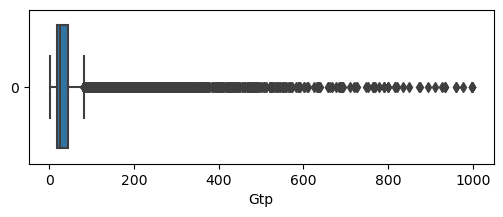

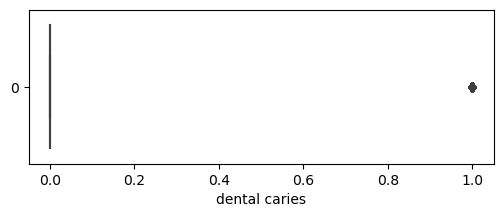

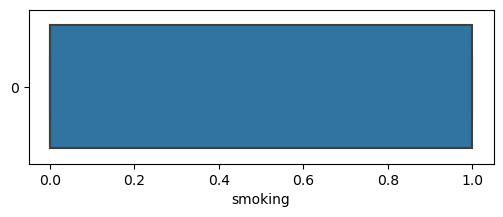

In [88]:
for i in df.columns:
    if(df[i].dtypes!='object'):
        plt.figure(figsize=(6,2))
        plt.xlabel(i)
        sns.boxplot(df[i], orient='h')
        plt.show()

# One hot Encoding

In [89]:
le = LabelEncoder()
for i in df.columns:
    if(df[i].dtypes=='object'):
        df[i] = le.fit_transform(df[i])

# Feature Selection

In [90]:
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0


In [91]:
X = df.drop(columns=['smoking'])
y= df['smoking']

In [92]:
etf = ExtraTreesClassifier()
etf.fit(X, y)

ExtraTreesClassifier()

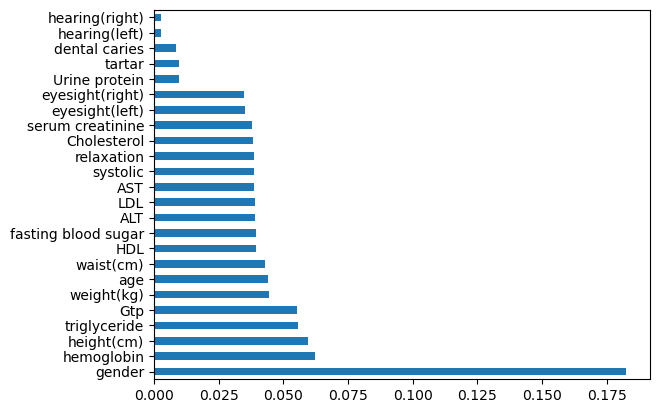

In [93]:
df1 = pd.Series(etf.feature_importances_, index=X.columns)
df1.nlargest(24).plot(kind='barh')
plt.show()

In [94]:
df.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar',
       'smoking'],
      dtype='object')

In [95]:
X = df[['gender','height(cm)','triglyceride','hemoglobin','Gtp','age','weight(kg)', 'waist(cm)','HDL','fasting blood sugar','LDL','systolic','ALT','relaxation','Cholesterol']]
X

,gender,height(cm),triglyceride,hemoglobin,Gtp,age,weight(kg),waist(cm),HDL,fasting blood sugar,LDL,systolic,ALT,relaxation,Cholesterol
0,0,155,82.0,12.9,27.0,40,60,81.3,73.0,94.0,126.0,114.0,19.0,73.0,215.0
1,0,160,115.0,12.7,18.0,40,60,81.0,42.0,130.0,127.0,119.0,19.0,70.0,192.0
2,1,170,182.0,15.8,22.0,55,60,80.0,55.0,89.0,151.0,138.0,16.0,86.0,242.0
3,1,165,254.0,14.7,18.0,40,70,88.0,45.0,96.0,226.0,100.0,26.0,60.0,322.0
4,0,155,74.0,12.5,22.0,40,60,86.0,62.0,80.0,107.0,120.0,14.0,74.0,184.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0,170,99.0,12.3,10.0,40,65,75.0,75.0,89.0,118.0,110.0,7.0,68.0,213.0
55688,0,160,69.0,14.0,14.0,45,50,70.0,73.0,89.0,79.0,101.0,12.0,62.0,166.0
55689,0,160,77.0,12.4,12.0,55,50,68.5,79.0,88.0,63.0,117.0,11.0,72.0,158.0
55690,1,165,79.0,14.4,18.0,60,60,78.0,48.0,107.0,146.0,133.0,19.0,76.0,210.0


# Logistic Regression

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [97]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [98]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [99]:
y_pred = lr.predict(X_test)

In [100]:
accuracy_score(y_test,y_pred)

0.7305862285662986

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      7027
           1       0.62      0.69      0.65      4112

    accuracy                           0.73     11139
   macro avg       0.71      0.72      0.72     11139
weighted avg       0.74      0.73      0.73     11139



# Decision tree

In [102]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [103]:
y_pred = dt.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7902863811832301
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      7027
           1       0.72      0.71      0.71      4112

    accuracy                           0.79     11139
   macro avg       0.77      0.77      0.77     11139
weighted avg       0.79      0.79      0.79     11139



# Bagging Algorithm - Bagging Classifier

In [104]:
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000)
bc.fit(X_train,y_train).score(X_test,y_test)

0.8265553460813359

In [105]:
y_pred = bc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7027
           1       0.75      0.79      0.77      4112

    accuracy                           0.83     11139
   macro avg       0.81      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139



# Bagging Algorithm – Extra Trees

In [106]:
et = ExtraTreesClassifier(n_estimators=1000, random_state=42)
et.fit(X_train,y_train)

ExtraTreesClassifier(n_estimators=1000, random_state=42)

In [107]:
y_pred = et.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      7027
           1       0.75      0.81      0.78      4112

    accuracy                           0.83     11139
   macro avg       0.82      0.83      0.82     11139
weighted avg       0.83      0.83      0.83     11139



# Bagging Algorithm – Random Forest

In [108]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [109]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      7027
           1       0.75      0.80      0.77      4112

    accuracy                           0.83     11139
   macro avg       0.81      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139

